In [79]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import lightgbm as lgb
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
import json
import ast
import time
from sklearn import linear_model
import eli5
from eli5.sklearn import PermutationImportance
import shap
from tqdm import tqdm_notebook
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import GenericUnivariateSelect, SelectPercentile, SelectKBest, f_classif, mutual_info_classif, RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier

# import json
import ujson as json
import altair as alt
from  altair import v3
from IPython.display import HTML

from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

## Data overview

In [81]:
train = pd.read_csv('/Users/mant1/input/dota_csv/train_features.csv', index_col='match_id_hash', engine='python')
target = pd.read_csv('/Users/mant1/input/dota_csv/train_targets.csv', index_col='match_id_hash', engine='python')
test = pd.read_csv('/Users/mant1/input/dota_csv/test_features.csv', index_col='match_id_hash', engine='python')
PATH = '/Users/mant1/input/dota_csv/'

In [82]:
target['next_roshan_team'].value_counts()

Radiant    13190
Dire       12135
Name: next_roshan_team, dtype: int64

In [85]:
target.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [86]:
train.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350.93784,2,116,122,0.000000,0,0,1,0,0.000000,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254.93774,2,124,126,0.000000,0,0,0,0,0.000000,0,0,0,0,14,0,1,0,0,304,0,130,700,700,242.93773,1,70,156,0.000000,0,0,1,0,0.000000,0,0,0,0,59,0,0,0,1,389,4,506,399,700,326.93780,2,170,86,0.000000,0,0,0,0,0.000000,0,0,0,0,77,0,0,0,0,402,10,344,422,800,314.93780,2,120,100,0.000000,0,0,0,0,0.000000,0,0,0,0,12,0,0,1,13,982,12,780,650,720,386.93787,3,82,170,0.000000,0,0,1,0,1.00,0,0,0,0,21,0,0,0,6,788,9,706,640,640,422.93790,3,174,90,0.000000,0,0,2,0,0.00,0,0,0,0,60,0,0,0,1,531,0,307,720,720,242.93773,2,180,84,0.299948,0,0,2,0,0.00,0,0,0,0,84,1,0,0

In [87]:
n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

Training function

In [88]:
def train_model(X, X_test, y, params, folds, model_type='lgb', plot_feature_importance=False, averaging='usual', model=None):
    oof = np.zeros(len(X))
    prediction = np.zeros(len(X_test))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X.loc[train_index], X.loc[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            train_data = lgb.Dataset(X_train, label=y_train)
            valid_data = lgb.Dataset(X_valid, label=y_valid)
            
            model = lgb.train(params,
                    train_data,
                    num_boost_round=20000,
                    valid_sets = [train_data, valid_data],
                    verbose_eval=1000,
                    early_stopping_rounds = 200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X_train.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X_train.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X_train.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X_train.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict_proba(X_valid).reshape(-1,)
            score = roc_auc_score(y_valid, y_pred_valid)
            # print(f'Fold {fold_n}. AUC: {score:.4f}.')
            # print('')
            
            y_pred = model.predict_proba(X_test)[:, 1]
            
        if model_type == 'glm':
            model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
            model_results = model.fit()
            model_results.predict(X_test)
            y_pred_valid = model_results.predict(X_valid).reshape(-1,)
            score = roc_auc_score(y_valid, y_pred_valid)
            
            y_pred = model_results.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostClassifier(iterations=20000, learning_rate=0.05, loss_function='Logloss',  eval_metric='AUC', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict_proba(X_valid)[:, 1]
            y_pred = model.predict_proba(X_test)[:, 1]
            
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(roc_auc_score(y_valid, y_pred_valid))

        if averaging == 'usual':
            prediction += y_pred
        elif averaging == 'rank':
            prediction += pd.Series(y_pred).rank().values  
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importance()
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction, scores
    
    else:
        return oof, prediction, scores

In [89]:
param = {
        'bagging_freq': 5,  #handling overfitting
        'bagging_fraction': 0.5,  #handling overfitting - adding some noise
        'boost_from_average':'false',
        'boost': 'gbdt',
        'feature_fraction': 0.05, #handling overfitting
        'learning_rate': 0.01,  #the changes between one auc and a better one gets really small thus a small learning rate performs better
        'max_depth': -1,  
        'metric':'auc',
        'min_data_in_leaf': 50,
        'min_sum_hessian_in_leaf': 10.0,
        'num_leaves': 10,
        'num_threads': 5,
        'tree_learner': 'serial',
        'objective': 'binary', 
        'verbosity': 1,
        'seed': 17
    }

In [90]:
params2 = {
       'bagging_freq': 5,  #handling overfitting
       'bagging_fraction': 0.5,  #handling overfitting - adding some noise
       'boost_from_average':'false',
       'boost': 'gbdt',
       'feature_fraction': 0.6534414209120409,
       'learning_rate': 0.01,
       'max_bin': 1000,
       'max_depth': 7,
       'min_child_samples': 75,
       'min_child_weight': 0,
       'num_leaves': 15,
       'reg_alpha': 1.0,
       'reg_lambda': 1e-09,
       'scale_pos_weight': 1.0,
       'subsample_for_bin': 500000,
       'num_threads': 5,
       'tree_learner': 'serial',
       'objective': 'binary',
       'verbosity': 1,
       'metric':'auc',
       'seed': 17 }

In [91]:
params = {'boost': 'gbdt',
          'feature_fraction': 0.05,
          'learning_rate': 0.01,
          'max_depth': -1,  
          'metric':'auc',
          'min_data_in_leaf': 50,
          'num_leaves': 32,
          'num_threads': -1,
          'verbosity': 1,
          'objective': 'binary',
          'seed': 17
         }

In [92]:
y = target['radiant_win']

### Working with json data

In [93]:
with open(os.path.join(PATH, 'train_matches.jsonl')) as fin:
    # read the 18-th line
    for i in range(18):
        line = fin.readline()
    
    # read JSON into a Python object 
    match = json.loads(line)

In [94]:
match.keys()

dict_keys(['game_time', 'match_id_hash', 'teamfights', 'objectives', 'chat', 'game_mode', 'lobby_type', 'players', 'targets'])

In [95]:
# match['players'][1]

In [96]:
def read_matches(matches_file):
    
    MATCHES_COUNT = {
        'test_matches.jsonl': 10000,
        'train_matches.jsonl': 39675,
    }
    _, filename = os.path.split(matches_file)
    total_matches = MATCHES_COUNT.get(filename)
    
    with open(matches_file) as fin:
        for line in tqdm_notebook(fin, total=total_matches):
            yield json.loads(line)

In [97]:
import collections

MATCH_FEATURES = [
    ('game_time', lambda m: m['game_time']),
    ('game_mode', lambda m: m['game_mode']),
    ('lobby_type', lambda m: m['lobby_type']),
    ('objectives_len', lambda m: len(m['objectives'])),
    ('chat_len', lambda m: len(m['chat'])),
]

PLAYER_FIELDS = [
    'hero_id',
    
    'kills',
    'deaths',
    'assists',
    'denies',
    
    'gold',
    'lh',
    'xp',
    'health',
    'max_health',
    'max_mana',
    'level',

    'x',
    'y',
    
    'stuns',
    'creeps_stacked',
    'camps_stacked',
    'rune_pickups',
    'firstblood_claimed',
    'teamfight_participation',
    'towers_killed',
    'roshans_killed',
    'obs_placed',
    'sen_placed'
]
def sum_features(feature_log):
    sum = 0
    for key in feature_log:
        sum += feature_log[key]
    return sum

def extract_features_csv(match):
    row = [
        ('match_id_hash', match['match_id_hash']),
    ]

    for field, f in MATCH_FEATURES:
        row.append((field, f(match)))
        
    for slot, player in enumerate(match['players']):
        if slot < 5:
            player_name = 'r%d' % (slot + 1)
        else:
            player_name = 'd%d' % (slot - 4)

        row.append( (f'{player_name}_items', list(map(lambda x: x['id'][5:], player['hero_inventory']))))
#         row.append( (f'{player_name}_stash_items', list(map(lambda x: x['id'][5:], player['hero_stash']))))
#         row.append( (f'{player_name}_purchase_items', list(player['purchase'])))

        for field in PLAYER_FIELDS:
            column_name = '%s_%s' % (player_name, field)
            row.append((column_name, player[field]))
        row.append((f'{player_name}_ability_level', len(player['ability_upgrades'])))
        row.append((f'{player_name}_max_hero_hit', player['max_hero_hit']['value']))
        row.append((f'{player_name}_purchase_count', len(player['purchase_log'])))
        row.append((f'{player_name}_count_ability_use', sum(player['ability_uses'].values())))
        row.append((f'{player_name}_damage_dealt', sum(player['damage'].values())))
        row.append((f'{player_name}_damage_received', sum(player['damage_taken'].values())))

# Counting aegis stolen for both teams
        radiant_aegis_stolen = 0
        dire_aegis_stolen = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_AEGIS_STOLEN':
                if objective['slot'] <=4:
                    radiant_aegis_stolen += 1
                if objective['slot'] >=5:
                    dire_aegis_stolen += 1

        row.append(('radiant_aegis_stolen', radiant_aegis_stolen))
        row.append(('dire_aegis_stolen', dire_aegis_stolen))
        row.append(('diff_aegis', radiant_aegis_stolen - dire_aegis_stolen))
        
# Counting ruined towers for both teams
        radiant_tower_kills = 0
        dire_tower_kills = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_TOWER_KILL':
                if objective['team'] == 2:
                    radiant_tower_kills += 1
                if objective['team'] == 3:
                    dire_tower_kills += 1

        row.append(('radiant_tower_kills', radiant_tower_kills))
        row.append(('dire_tower_kills', dire_tower_kills))
        row.append(('diff_tower_kills', radiant_tower_kills - dire_tower_kills))
        
# Counting baracks destroed for both teams
        radiant_barracks_kills = 0
        radiant_barracks1_kills = 0
        dire_barracks_kills = 0
        dire_barracks1_kills = 0
        radiant = ['1','2','4','8','16','32']
        dire = ['64','128','256','512','1024','2048']
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_BARRACKS_KILL':
                if objective['key'] in ['1', '4', '16']:
                    radiant_barracks_kills += 1
                if objective['key'] in ['1', '8', '32']:
                    radiant_barracks1_kills += 1
                if objective['key'] in ['64', '256', '1024']:
                    dire_barracks_kills += 1
                if objective['key'] in ['128', '512', '2048']:
                    dire_barracks1_kills += 1
        row.append(('megacreep', (int(radiant_barracks_kills+radiant_barracks1_kills ==6) - int(dire_barracks_kills+dire_barracks1_kills==6))))
        row.append(('radiant_barracks_kills', radiant_barracks_kills))
        row.append(('dire_barracks_kills', dire_barracks_kills))
        row.append(('diff_barracks_kills', radiant_barracks_kills - dire_barracks_kills))
        row.append(('diff_barracks_kills1', radiant_barracks1_kills - dire_barracks1_kills))
    
    return collections.OrderedDict(row)
    
def extract_targets_csv(match, targets):
    return collections.OrderedDict([('match_id_hash', match['match_id_hash'])] + [
        (field, targets[field])
        for field in ['game_time', 'radiant_win', 'duration', 'time_remaining', 'next_roshan_team']
    ])

In [98]:
# Make reverse data move
def extract_inverse_features_csv(match):
    row = [
        ('match_id_hash', match['match_id_hash'][::-1]),
    ]
    
    for field, f in MATCH_FEATURES:
        row.append((field, f(match)))
        
    for slot, player in enumerate(match['players']):
        if slot < 5:
            player_name = 'd%d' % (slot + 1)
        else:
            player_name = 'r%d' % (slot - 4)
        
        row.append( (f'{player_name}_items', list(map(lambda x: x['id'][5:], player['hero_inventory']))))
#         row.append( (f'{player_name}_stash_items', list(map(lambda x: x['id'][5:], player['hero_stash']))))
#         row.append( (f'{player_name}_purchase_items', list(player['purchase'])))
        for field in PLAYER_FIELDS:
            column_name = '%s_%s' % (player_name, field)
            row.append((column_name, player[field]))
        row.append((f'{player_name}_ability_level', len(player['ability_upgrades'])))
        row.append((f'{player_name}_max_hero_hit', player['max_hero_hit']['value']))
        row.append((f'{player_name}_purchase_count', len(player['purchase_log'])))
        row.append((f'{player_name}_count_ability_use', sum(player['ability_uses'].values())))
        row.append((f'{player_name}_damage_dealt', sum(player['damage'].values())))
        row.append((f'{player_name}_damage_received', sum(player['damage_taken'].values())))

# Counting aegis stolen for both teams
        radiant_aegis_stolen = 0
        dire_aegis_stolen = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_AEGIS_STOLEN':
                if objective['slot'] >=5:
                    radiant_aegis_stolen += 1
                if objective['slot'] <=4:
                    dire_aegis_stolen += 1

        row.append(('radiant_aegis_stolen', radiant_aegis_stolen))
        row.append(('dire_aegis_stolen', dire_aegis_stolen))
        row.append(('diff_aegis', radiant_aegis_stolen - dire_aegis_stolen))
# Counting ruined towers for both teams
        radiant_tower_kills = 0
        dire_tower_kills = 0
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_TOWER_KILL':
                if objective['team'] == 3:
                    radiant_tower_kills += 1
                if objective['team'] == 2:
                    dire_tower_kills += 1

        row.append(('radiant_tower_kills', radiant_tower_kills))
        row.append(('dire_tower_kills', dire_tower_kills))
        row.append(('diff_tower_kills', radiant_tower_kills - dire_tower_kills))
        
# Counting baracks destroed for both teams
        radiant_barracks_kills = 0
        radiant_barracks1_kills = 0
        dire_barracks_kills = 0
        dire_barracks1_kills = 0
        radiant = ['1','2','4','8','16','32']
        dire = ['64','128','256','512','1024','2048']
        for objective in match['objectives']:
            if objective['type'] == 'CHAT_MESSAGE_BARRACKS_KILL':
                if objective['key'] in ['1', '4', '16']:
                    dire_barracks_kills += 1
                if objective['key'] in ['1', '8', '32']:
                    dire_barracks1_kills += 1
                if objective['key'] in ['64', '256', '1024']:
                    radiant_barracks_kills += 1
                if objective['key'] in ['128', '512', '2048']:
                    radiant_barracks1_kills += 1
        row.append(('megacreep', (int(radiant_barracks_kills+radiant_barracks1_kills ==6) - int(dire_barracks_kills+dire_barracks1_kills==6))))
        row.append(('radiant_barracks_kills', radiant_barracks_kills))
        row.append(('dire_barracks_kills', dire_barracks_kills))
        row.append(('diff_barracks_kills', radiant_barracks_kills - dire_barracks_kills))
        row.append(('diff_barracks_kills1', radiant_barracks1_kills - dire_barracks1_kills))
       
    return collections.OrderedDict(row)
    
def extract_inverse_targets_csv(match, targets):
    return collections.OrderedDict([('match_id_hash', match['match_id_hash'][::-1])] + [
        (field,  not targets[field])
        for field in ['game_time', 'radiant_win', 'duration', 'time_remaining', 'next_roshan_team']
    ])

In [99]:
%%time

df_features = []
df_targets = []

df_inverse_features = []
df_inverse_targets = []

for match in read_matches(os.path.join(PATH, 'train_matches.jsonl')):
    features = extract_features_csv(match)
    inverse_features = extract_inverse_features_csv(match)
    targets = extract_targets_csv(match, match['targets'])
    inverse_targets = extract_inverse_targets_csv(match, match['targets'])
    
    df_features.append(features)
    df_inverse_features.append(features)
    df_inverse_features.append(inverse_features)
    df_targets.append(targets)
    df_inverse_targets.append(targets)
    df_inverse_targets.append(inverse_targets)


CPU times: user 1min 6s, sys: 2.8 s, total: 1min 9s
Wall time: 1min 9s


In [100]:
train_df = pd.DataFrame.from_records(df_features).set_index('match_id_hash')
y_train = pd.DataFrame.from_records(df_targets).set_index('match_id_hash')
y_train = y_train['radiant_win'].map({True: 1, False: 0})

In [101]:
df_new_features = pd.DataFrame.from_records(df_inverse_features).set_index('match_id_hash')
y_train_inverse = pd.DataFrame.from_records(df_inverse_targets).set_index('match_id_hash')
y_train_inverse = y_train_inverse['radiant_win'].map({True: 1, False: 0})

In [102]:
df_new_features.shape

(79350, 326)

In [105]:
# import pickle as pkl
# yt.to_pickle('target_final2_features.pkl')

In [106]:
print(train_df.shape)
print(df_new_features.shape)

(39675, 326)
(79350, 326)


In [107]:
# # Using without double train data
# # %%time
# PATH_TO_DATA = PATH
# df_new_features = []
# df_new_targets = []

# for match in read_matches(os.path.join(PATH_TO_DATA, 'train_matches.jsonl')):
#     match_id_hash = match['match_id_hash']
#     features = extract_features_csv(match)
#     targets = extract_targets_csv(match, match['targets'])
    
#     df_new_features.append(features)
#     df_new_targets.append(targets)

In [108]:
import os
import ujson as json
from tqdm import tqdm_notebook

def read_matches(matches_file):
    
    MATCHES_COUNT = {
        'test_matches.jsonl': 10000,
        'train_matches.jsonl': 39675,
    }
    _, filename = os.path.split(matches_file)
    total_matches = MATCHES_COUNT.get(filename)
    
    with open(matches_file) as fin:
        for line in tqdm_notebook(fin, total=total_matches):
            yield json.loads(line)

def add_new_features(df_features, matches_file):
    
    # Process raw data and add new features
    for match in read_matches(matches_file):
        match_id_hash = match['match_id_hash']
        if (match['game_time'] == 0) and (len(match['players'][0]['times']) > 0):
            df_features.loc[match_id_hash, 'game_time'] = match['players'][0]['times'][-1] + 30
            
        game_time = int(df_features.loc[match_id_hash, 'game_time'])
  
        
        ### Damage features// team damage vs heroes, vs towers and vs creeps
        ### also buybacks for last 5 mins
        ### also observers placed for last 5 mins
        ### also healing
        ### also lifestate
        
        team_damage_vs_other_team = 0
        
        damage_vs_dire_tower = 0
        damage_vs_rad_tower = 0
        
        rad_vs_creeps = 0
        dire_vs_creeps = 0
        
        dire_bb = 0
        rad_bb = 0
        
        dire_obs, rad_obs = 0, 0
        rad_heal ,dire_heal = 0, 0
        rad_alive, rad_dead = 0, 0
        dire_alive, dire_dead = 0, 0
        
        dire_actions, rad_actions = 0, 0
        rad_items, dire_items = 0, 0
        rad_ability, dire_ability = 0, 0 
        
        for i, player in enumerate(match['players']):
            for whom in player['damage'].keys():
                if whom[9:13] == 'hero':
                    team_damage_vs_other_team += player['damage'][whom]
                
                elif (whom[0:22] == 'npc_dota_badguys_tower') and (i < 5):
                    damage_vs_dire_tower += player['damage'][whom]
                elif (whom[0:23] == 'npc_dota_goodguys_tower') and (i >=5):
                    damage_vs_rad_tower += player['damage'][whom]
                elif (whom[0:22] == 'npc_dota_creep_badguys') and (i < 5):
                    rad_vs_creeps += player['damage'][whom]
                elif (whom[0:23] == 'npc_dota_creep_goodguys') and (i >= 5):
                    dire_vs_creeps += player['damage'][whom]
                
            if i == 4:
                df_features.loc[match_id_hash, 'rad_damage_vs_heroes'] = team_damage_vs_other_team
                team_damage_vs_other_team = 0
            
            elif i == 9:
                df_features.loc[match_id_hash, 'dire_damage_vs_heroes'] = team_damage_vs_other_team
        
            
            
            ### buybacks
            if len(player['buyback_log']) > 0:
                  
                if (i < 5) and (game_time < player['buyback_log'][-1]['time'] + 300):
                    rad_bb += 1
                elif (i >= 5) and (game_time < player['buyback_log'][-1]['time'] + 300):
                    dire_bb += 1
                    
            if len(player['obs_log']) > 0:
                for obs in player['obs_log']:  
                    if (i < 5) and (game_time < obs['time'] + 300):
                        rad_obs += 1
                    elif (i >= 5) and (game_time < obs['time'] + 300):
                        dire_obs += 1
            
            if len(player['healing']) > 0:
                if i < 5:
                    rad_heal += sum(list(player['healing'].values()))
                else:
                    dire_heal += sum(list(player['healing'].values()))
                
                
            if i < 5:
                if '0' in player['life_state'].keys():
                    rad_alive += player['life_state']['0']
                if '2' in player['life_state'].keys():
                    rad_dead += player['life_state']['2'] 
            else:
                if '0' in player['life_state'].keys():
                    dire_alive += player['life_state']['0']
                if '2' in player['life_state'].keys():
                    dire_dead += player['life_state']['2']
                
            rad_actions += int(i<5) * sum(list(player['actions'].values()))
            dire_actions += int(i>4) * sum(list(player['actions'].values()))
        
            rad_items += int(i<5) * sum(list(player['item_uses'].values()))
            dire_items += int(i>4) * sum(list(player['item_uses'].values()))
            
            rad_ability += int(i<5) * sum(list(player['ability_uses'].values()))
            dire_ability += int(i>4) * sum(list(player['ability_uses'].values()))
            
        df_features.loc[match_id_hash, 'bb_restr_Diff'] = rad_bb - dire_bb                 ### bb
        
        df_features.loc[match_id_hash, 'obs_on_map_Diff'] = rad_obs - dire_obs             ### obs
        
        df_features.loc[match_id_hash, 'rad_damage_vs_tower'] = damage_vs_dire_tower
        df_features.loc[match_id_hash, 'dire_damage_vs_tower'] = damage_vs_rad_tower
        
        if  (damage_vs_dire_tower + damage_vs_rad_tower) > 0:
            df_features.loc[match_id_hash, 'damage_vs_tower_Percent'] = damage_vs_dire_tower / \
                (damage_vs_dire_tower + damage_vs_rad_tower)                                   ### damage vs tower
        else:
            df_features.loc[match_id_hash, 'damage_vs_tower_Percent']= 0.5
            
        df_features.loc[match_id_hash, 'rad_damage_vs_creeps'] = rad_vs_creeps             
        df_features.loc[match_id_hash, 'dire_damage_vs_creeps'] = dire_vs_creeps
        if  (dire_vs_creeps + rad_vs_creeps)  > 0:            
            df_features.loc[match_id_hash, 'damage_vs_creeps_Percent'] = rad_vs_creeps / \
                (dire_vs_creeps + rad_vs_creeps)                                              ### damage vs creeps
        else:
            df_features.loc[match_id_hash, 'damage_vs_creeps_Percent'] = 0.5 
        
        df_features.loc[match_id_hash, 'healing_Diff'] = (rad_heal - dire_heal)
        if dire_heal + rad_heal > 0:
            df_features.loc[match_id_hash, 'healing_Percent'] = rad_heal / (dire_heal + rad_heal)
                               ### healing
        else:
            df_features.loc[match_id_hash, 'healing_Percent'] = 0.5
        if (rad_alive + dire_alive) != 0:
            df_features.loc[match_id_hash, 'alive_Percent'] = (rad_alive) / (rad_alive + dire_alive)
        else:
            df_features.loc[match_id_hash, 'alive_Percent'] = 0.5
        if (rad_dead + dire_dead) != 0:
            df_features.loc[match_id_hash, 'dead_Percent'] = (rad_dead) / (rad_dead + dire_dead)     ### life_state
        else:
            df_features.loc[match_id_hash, 'dead_Percent'] = 0.5
        
        if (rad_actions + dire_actions) > 0:
            df_features.loc[match_id_hash, 'actions_Percent'] = rad_actions / (rad_actions + dire_actions)
        else:
            df_features.loc[match_id_hash, 'actions_Percent'] = 0.5
            
        df_features.loc[match_id_hash, 'actions_Diff_permin'] = (rad_actions - dire_actions) / (game_time // 60 + 1)
        
        if (rad_items + dire_items) > 0:
            df_features.loc[match_id_hash, 'items_uses_Percent'] = rad_items / (rad_items + dire_items)
        else:
            df_features.loc[match_id_hash, 'items_uses_Percent'] = 0.5
            
        df_features.loc[match_id_hash, 'items_uses_Diff_permin'] = (rad_items - dire_items) / (game_time // 60 + 1)
        
        if (rad_ability + dire_ability) > 0:
            df_features.loc[match_id_hash, 'ability_Percent'] = rad_ability / (rad_ability + dire_ability)
        else:
            df_features.loc[match_id_hash, 'ability_Percent'] = 0.5
            
        df_features.loc[match_id_hash, 'ability_Diff_permin'] = (rad_ability - dire_ability) / (game_time // 60 + 1)

In [109]:
add_new_features(df_new_features, os.path.join(PATH, 'train_matches.jsonl'))

In [110]:
df_new_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_items,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r1_ability_level,r1_max_hero_hit,r1_purchase_count,r1_count_ability_use,r1_damage_dealt,r1_damage_received,radiant_aegis_stolen,dire_aegis_stolen,diff_aegis,radiant_tower_kills,dire_tower_kills,diff_tower_kills,megacreep,radiant_barracks_kills,dire_barracks_kills,diff_barracks_kills,diff_barracks_kills1,r2_items,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r2_ability_level,r2_max_hero_hit,r2_purchase_count,r2_count_ability_use,r2_damage_dealt,r2_damage_received,r3_items,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r3_ability_level,r3_max_hero_hit,r3_purchase_count,r3_count_ability_use,r3_damage_dealt,r3_damage_received,r4_items,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r4_ability_level,r4_max_hero_hit,r4_purchase_count,r4_count_ability_use,r4_damage_dealt,r4_damage_received,r5_items,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,r5_ability_level,r5_max_hero_hit,r5_purchase_count,r5_count_ability_use,r5_damage_dealt,r5_damage_received,d1_items,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d1_ability_level,d1_max_hero_hit,d1_purchase_count,d1_count_ability_use,d1_damage_dealt,d1_damage_received,d2_items,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d2_ability_level,d2_max_hero_hit,d2_purchase_count,d2_count_ability_use,d2_damage_dealt,d2_damage_received,d3_items,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d3_ability_level,d3_max_hero_hit,d3_purchase_count,d3_count_ability_use,d3_damage_dealt,d3_damage_received,d4_items,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d4_ability_level,d4_max_hero_hit,d4_purchase_count,d4_count_ability_use,d4_damage_dealt,d4_damage_received,d5_items,d5_hero_id,

In [111]:
# df_new_features = pd.DataFrame.from_records(df_new_features).set_index('match_id_hash')
# df_new_targets = pd.DataFrame.from_records(df_new_targets).set_index('match_id_hash')

In [112]:
# df_new_features.head()

In [113]:
df_new_features = df_new_features.fillna(0)

In [114]:
# df_new_features[df_new_features['game_time'] == 0]

In [115]:
# df_new_features['dire_aegis_stolen'].value_counts()

In [116]:
test_new_features = []
for match in read_matches(os.path.join(PATH, 'test_matches.jsonl')):
    match_id_hash = match['match_id_hash']
    features = extract_features_csv(match)
    
    test_new_features.append(features)
test_new_features = pd.DataFrame.from_records(test_new_features).set_index('match_id_hash')

In [117]:
add_new_features(test_new_features, os.path.join(PATH, 'test_matches.jsonl'))

In [118]:
test_new_features = test_new_features.fillna(0)

In [119]:
df_new_features.shape, test_new_features.shape

((79350, 346), (10000, 346))

In [120]:
# Adding items
def add_items_dummies(df_new_features, test_new_features):
    
    full_df = pd.concat([df_new_features, test_new_features], sort=False)
    train_size = df_new_features.shape[0]

    for team in 'r', 'd':
        players = [f'{team}{i}' for i in range(1, 6)]
        item_columns = [f'{player}_items' for player in players]

        d = pd.get_dummies(full_df[item_columns[0]].apply(pd.Series).stack()).sum(level=0, axis=0)
        dindexes = d.index.values

        for c in item_columns[1:]:
            d = d.add(pd.get_dummies(full_df[c].apply(pd.Series).stack()).sum(level=0, axis=0), fill_value=0)
            d = d.ix[dindexes]
 
        full_df = pd.concat([full_df, d.add_prefix(f'{team}_item_')], axis=1, sort=False)
        full_df.drop(columns=item_columns, inplace=True)

    df_new_features = full_df.iloc[:train_size, :]
    test_new_features = full_df.iloc[train_size:, :]

    return df_new_features, test_new_features

In [121]:
# Drop consumble items
def drop_consumble_items(df_new_features, test_new_features):
    
    full_df = pd.concat([df_new_features, test_new_features], sort=False)
    train_size = df_new_features.shape[0]

    for team in 'r', 'd':
        consumble_columns = ['tango', 'tpscroll', 
                             'bottle', 'flask',
                            'enchanted_mango', 'clarity',
                            'faerie_fire', 'ward_observer',
                            'ward_sentry']
        
        starts_with = f'{team}_item_'
        consumble_columns = [starts_with + column for column in consumble_columns]
        full_df.drop(columns=consumble_columns, inplace=True)

    df_new_features = full_df.iloc[:train_size, :]
    test_new_features = full_df.iloc[train_size:, :]

    return df_new_features, test_new_features

In [122]:
%%time
df_new_features, test_new_features = add_items_dummies(df_new_features, test_new_features)
df_new_features, test_new_features = drop_consumble_items(df_new_features, test_new_features)

CPU times: user 4min 13s, sys: 23.5 s, total: 4min 36s
Wall time: 4min 32s


In [123]:
df_new_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r1_ability_level,r1_max_hero_hit,r1_purchase_count,r1_count_ability_use,r1_damage_dealt,r1_damage_received,radiant_aegis_stolen,dire_aegis_stolen,diff_aegis,radiant_tower_kills,dire_tower_kills,diff_tower_kills,megacreep,radiant_barracks_kills,dire_barracks_kills,diff_barracks_kills,diff_barracks_kills1,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r2_ability_level,r2_max_hero_hit,r2_purchase_count,r2_count_ability_use,r2_damage_dealt,r2_damage_received,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r3_ability_level,r3_max_hero_hit,r3_purchase_count,r3_count_ability_use,r3_damage_dealt,r3_damage_received,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r4_ability_level,r4_max_hero_hit,r4_purchase_count,r4_count_ability_use,r4_damage_dealt,r4_damage_received,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,r5_ability_level,r5_max_hero_hit,r5_purchase_count,r5_count_ability_use,r5_damage_dealt,r5_damage_received,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d1_ability_level,d1_max_hero_hit,d1_purchase_count,d1_count_ability_use,d1_damage_dealt,d1_damage_received,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d2_ability_level,d2_max_hero_hit,d2_purchase_count,d2_count_ability_use,d2_damage_dealt,d2_damage_received,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d3_ability_level,d3_max_hero_hit,d3_purchase_count,d3_count_ability_use,d3_damage_dealt,d3_damage_received,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d4_ability_level,d4_max_hero_hit,d4_purchase_count,d4_count_ability_use,d4_damage_dealt,d4_damage_received,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max

In [124]:
for c in ['kills', 'deaths', 'assists', 'denies', 'gold', 'lh', 'xp', 'health', 'max_health', 'max_mana', 'level', 'x', 'y', 'stuns', 'creeps_stacked', 'camps_stacked', 'rune_pickups',
          'firstblood_claimed', 'teamfight_participation', 'towers_killed', 'roshans_killed', 'obs_placed', 'sen_placed', 'ability_level', 'max_hero_hit', 'purchase_count',
          'count_ability_use', 'damage_dealt', 'damage_received']:
    r_columns = [f'r{i}_{c}' for i in range(1, 6)]
    d_columns = [f'd{i}_{c}' for i in range(1, 6)]
    
    df_new_features['r_total_' + c] = df_new_features[r_columns].sum(1)
    df_new_features['d_total_' + c] = df_new_features[d_columns].sum(1)
    df_new_features['total_' + c + '_ratio'] = df_new_features['r_total_' + c] / df_new_features['d_total_' + c]
    
    test_new_features['r_total_' + c] = test_new_features[r_columns].sum(1)
    test_new_features['d_total_' + c] = test_new_features[d_columns].sum(1)
    test_new_features['total_' + c + '_ratio'] = test_new_features['r_total_' + c] / test_new_features['d_total_' + c]
    
    df_new_features['r_std_' + c] = df_new_features[r_columns].std(1)
    df_new_features['d_std_' + c] = df_new_features[d_columns].std(1)
    df_new_features['std_' + c + '_ratio'] = df_new_features['r_std_' + c] / df_new_features['d_std_' + c]
    
    test_new_features['r_std_' + c] = test_new_features[r_columns].std(1)
    test_new_features['d_std_' + c] = test_new_features[d_columns].std(1)
    test_new_features['std_' + c + '_ratio'] = test_new_features['r_std_' + c] / test_new_features['d_std_' + c]

Now let's try building a new model!

In [125]:
# Create hero ID
hero_columns = [c for c in df_new_features.columns if '_hero_' in c]
# train = train[hero_columns]
hero_columns2 = [c for c in test_new_features.columns if '_hero_' in c]
# test = test[hero_columns]

for team in 'r', 'd':
    players = [f'{team}{i}' for i in range(1, 6)]
    hero_columns = [f'{player}_hero_id' for player in players]
    d = pd.get_dummies(df_new_features[hero_columns[0]])
    for c in hero_columns[1:]:
        d += pd.get_dummies(df_new_features[c])
    df_new_features = pd.concat([df_new_features, d.add_prefix(f'{team}_hero_')], axis=1)

    
for team in 'r', 'd':
    players = [f'{team}{i}' for i in range(1, 6)]
    hero_columns2 = [f'{player}_hero_id' for player in players]
    d = pd.get_dummies(test_new_features[hero_columns2[0]])
    for c in hero_columns2[1:]:
        d += pd.get_dummies(test_new_features[c])
    test_new_features = pd.concat([test_new_features, d.add_prefix(f'{team}_hero_')], axis=1)

In [126]:
# Adding coordinate for teams
def make_coordinate_features(df):
    for team in 'r', 'd':
        players = [f'{team}{i}' for i in range(1, 6)]
        for player in players:
            df[f'{player}_distance'] = np.sqrt(df[f'{player}_x']**2 + df[f'{player}_y']**2)
            df.drop(columns=[f'{player}_x', f'{player}_y'], inplace=True)
    return df

In [127]:
df_new_features = make_coordinate_features(df_new_features)
test_new_features = make_coordinate_features(test_new_features)

In [128]:
# Combine numeric and drops duplicates
def combine_numeric_features (df, feature_suffixes):
    for feat_suff in feature_suffixes:
        for team in 'r', 'd':
            players = [f'{team}{i}' for i in range(1, 6)] # r1, r2...
            player_col_names = [f'{player}_{feat_suff}' for player in players] # e.g. r1_gold, r2_gold
            
            df[f'{team}_{feat_suff}_max'] = df[player_col_names].max(axis=1) # e.g. r_gold_max
            df[f'{team}_{feat_suff}_min'] = df[player_col_names].min(axis=1) # e.g. r_gold_min
            
            df.drop(columns=player_col_names, inplace=True) # remove raw features from the dataset
    return df

In [129]:
numeric_features = ['distance']
# numeric_features = ['kills', 'deaths', 'assists', 'denies', 'gold', 'xp', 'health', 'max_health',
#                     'max_mana', 'level', 'towers_killed', 'stuns', 'creeps_stacked', 'camps_stacked',
#                     'lh', 'rune_pickups', 'firstblood_claimed', 'teamfight_participation', 'roshans_killed',
#                     'obs_placed', 'sen_placed']

In [130]:
df_new_features = combine_numeric_features(df_new_features, numeric_features)
test_new_features = combine_numeric_features(test_new_features, numeric_features)

In [70]:
df_new_features.shape, test_new_features.shape

((79350, 734), (10000, 734))

In [71]:
# import pickle as pkl
# df_new_features.to_pickle('train2.pkl')
# test_new_features.to_pickle('test2.pkl')

In [131]:
df_new_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r1_ability_level,r1_max_hero_hit,r1_purchase_count,r1_count_ability_use,r1_damage_dealt,r1_damage_received,radiant_aegis_stolen,dire_aegis_stolen,diff_aegis,radiant_tower_kills,dire_tower_kills,diff_tower_kills,megacreep,radiant_barracks_kills,dire_barracks_kills,diff_barracks_kills,diff_barracks_kills1,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r2_ability_level,r2_max_hero_hit,r2_purchase_count,r2_count_ability_use,r2_damage_dealt,r2_damage_received,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r3_ability_level,r3_max_hero_hit,r3_purchase_count,r3_count_ability_use,r3_damage_dealt,r3_damage_received,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r4_ability_level,r4_max_hero_hit,r4_purchase_count,r4_count_ability_use,r4_damage_dealt,r4_damage_received,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,r5_ability_level,r5_max_hero_hit,r5_purchase_count,r5_count_ability_use,r5_damage_dealt,r5_damage_received,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d1_ability_level,d1_max_hero_hit,d1_purchase_count,d1_count_ability_use,d1_damage_dealt,d1_damage_received,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d2_ability_level,d2_max_hero_hit,d2_purchase_count,d2_count_ability_use,d2_damage_dealt,d2_damage_received,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d3_ability_level,d3_max_hero_hit,d3_purchase_count,d3_count_ability_use,d3_damage_dealt,d3_damage_received,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d4_ability_level,d4_max_hero_hit,d4_purchase_count,d4_count_ability_use,d4_damage_dealt,d4_damage_received,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_c

In [73]:
# X = df_new_features.reset_index(drop=True)
# X_test = test_new_features.copy().reset_index(drop=True)

In [132]:
X.shape, X_test.shape

((79350, 734), (10000, 734))

Fold 0 started at Tue Nov 19 11:13:55 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.861552	valid_1's auc: 0.846879
[2000]	training's auc: 0.882164	valid_1's auc: 0.850581
[3000]	training's auc: 0.898479	valid_1's auc: 0.851424
Early stopping, best iteration is:
[3078]	training's auc: 0.899768	valid_1's auc: 0.85158
Fold 1 started at Tue Nov 19 11:16:45 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.861904	valid_1's auc: 0.844829
[2000]	training's auc: 0.882257	valid_1's auc: 0.848995
[3000]	training's auc: 0.898637	valid_1's auc: 0.850187
[4000]	training's auc: 0.912741	valid_1's auc: 0.850578
Early stopping, best iteration is:
[4063]	training's auc: 0.913571	valid_1's auc: 0.850588
Fold 2 started at Tue Nov 19 11:20:11 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's auc: 0.861746	valid_1's auc: 0.845504
[2000]	training's auc: 0.882032	valid_1's auc: 0.8494

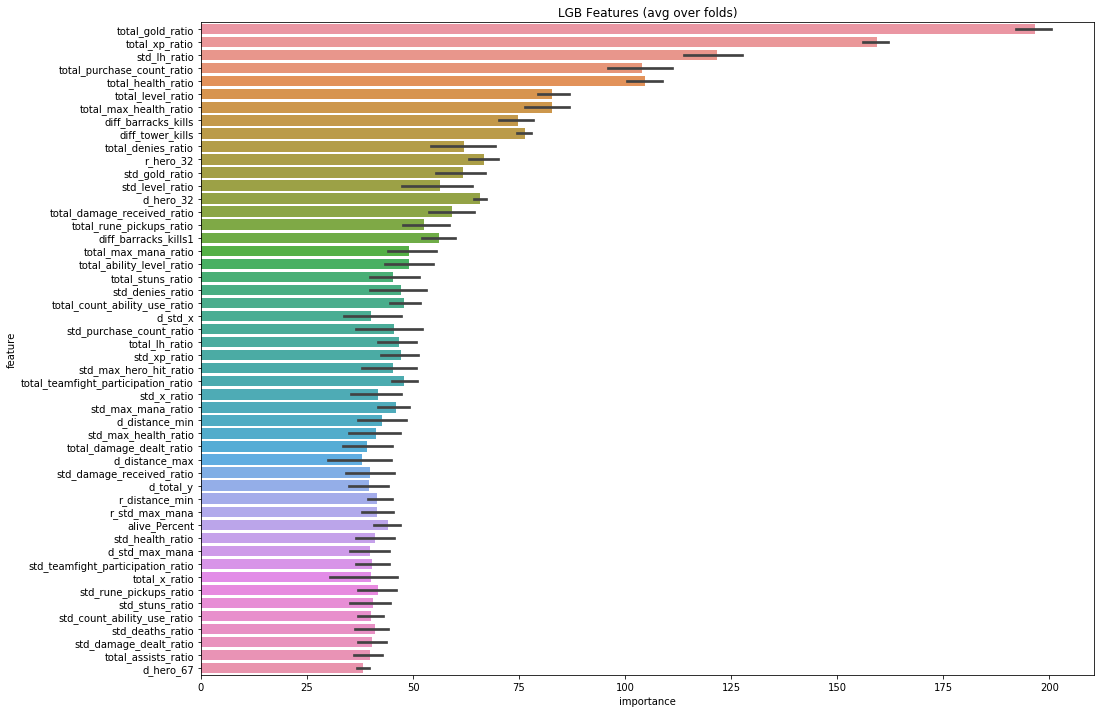

In [133]:
%%time
X = df_new_features.reset_index(drop=True)
X_test = test_new_features.copy().reset_index(drop=True)

oof_lgb, prediction_lgb, scores = train_model(X, X_test, y_train_inverse, params=params2, folds=folds, model_type='lgb', plot_feature_importance=True)

In [132]:
sub = pd.read_csv('/Users/mant1/input/dota_csv/sample_submission.csv')
sub['radiant_win_prob'] = prediction_lgb
sub.to_csv('submission_v15.csv', index=False)
sub.head()

,match_id_hash,radiant_win_prob
0,30cc2d778dca82f2edb568ce9b585caa,0.284332
1,70e5ba30f367cea48793b9003fab9d38,0.992162
2,4d9ef74d3a2025d79e9423105fd73d41,0.975972
3,2bb79e0c1eaac1608e5a09c8e0c6a555,0.827566
4,bec17f099b01d67edc82dfb5ce735a43,0.274927


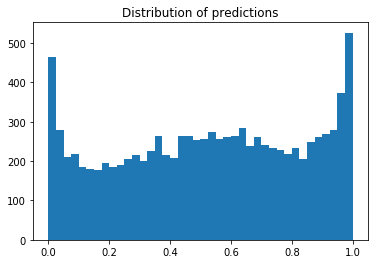

In [141]:
plt.hist(prediction_lgb, bins=40);
plt.title('Distribution of predictions');